# UTS MODEL DEPLOYMENT
## Maria Linneke Adjie - 2602076374

### Data Understanding

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('data_D.csv')

In [3]:
df.head()

,Unnamed: 0,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,churn
0,0,106473,15639576,Sarratt,652.0,France,Female,65.0,3,0.00,2,1,1,136592.24,0
1,1,62345,15769582,Hanson,464.0,France,Male,35.0,4,0.00,1,0,0,99505.75,1
2,2,126615,15675888,Austin,620.0,Germany,Female,39.0,6,129401.87,2,1,1,102681.32,1
3,3,35909,15786617,Tuan,598.0,France,Female,30.0,7,0.00,2,1,0,141210.18,0
4,4,45175,15757310,Li Fonti,682.0,Germany,Female,46.0,4,107720.57,1,0,0,93832.33,1


In [4]:
df.tail()

,Unnamed: 0,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,churn
41254,41254,105680,15671769,Nkemdirim,567.0,France,Female,37.0,1,121801.49,1,0,0,177028.00,0
41255,41255,70760,15570299,Martin,584.0,Germany,Female,31.0,4,152622.34,1,1,0,99298.80,0
41256,41256,3091,15807593,Tseng,684.0,France,Male,36.0,4,0.00,1,1,0,152992.04,0
41257,41257,20130,15583460,Nwankwo,709.0,France,Male,38.0,3,0.00,2,1,1,185580.23,0
41258,41258,161328,15681655,Hs?,850.0,France,Male,43.0,2,0.00,2,1,1,93882.93,0


In [5]:
df.shape

(41259, 15)

In [6]:
df.columns

Index(['Unnamed: 0', 'id', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'churn'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41259 entries, 0 to 41258
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       41259 non-null  int64  
 1   id               41259 non-null  int64  
 2   CustomerId       41259 non-null  int64  
 3   Surname          41259 non-null  object 
 4   CreditScore      41251 non-null  float64
 5   Geography        41259 non-null  object 
 6   Gender           41259 non-null  object 
 7   Age              41259 non-null  float64
 8   Tenure           41259 non-null  int64  
 9   Balance          41259 non-null  float64
 10  NumOfProducts    41259 non-null  int64  
 11  HasCrCard        41259 non-null  int64  
 12  IsActiveMember   41259 non-null  int64  
 13  EstimatedSalary  41259 non-null  float64
 14  churn            41259 non-null  int64  
dtypes: float64(4), int64(8), object(3)
memory usage: 4.7+ MB


Dapat diketahui bahwa data memiliki 41259 baris dan memiliki 15 kolom yang masing-masing kolom berisi:

    Unnamed: 0: Indeks atau nomor baris. 
    id: ID pelanggan.
    CustomerId: Identifier lain untuk pelanggan.
    Surname: Nama belakang pelanggan.
    CreditScore: Skor kredit pelanggan.
    Geography: Lokasi atau negara asal pelanggan.
    Gender: Jenis kelamin pelanggan.
    Age: Usia pelanggan.
    Tenure: Jumlah tahun pelanggan telah menjadi nasabah perusahaan.
    Balance: Saldo di akun pelanggan.
    NumOfProducts: Jumlah produk yang dimiliki pelanggan dengan perusahaan.
    HasCrCard: Apakah pelanggan memiliki kartu kredit (binary, 1 untuk ya, 0 untuk tidak).
    IsActiveMember: Apakah pelanggan adalah anggota aktif (binary, 1 untuk ya, 0 untuk tidak).
    EstimatedSalary: Pendapatan yang diperkirakan dari pelanggan.
    churn: Apakah pelanggan telah berhenti menggunakan layanan (binary, 1 untuk ya, 0 untuk tidak).

Yang menjadi kolom target adalah churn

In [8]:
df.isnull().sum()

Unnamed: 0         0
id                 0
CustomerId         0
Surname            0
CreditScore        8
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
churn              0
dtype: int64

Terdapat 8 missing value dalam kolom CreditScore

In [9]:
df["churn"].value_counts()

churn
0    32540
1     8719
Name: count, dtype: int64

In [10]:
churn0= (df['churn']==0).sum()
churn1 = (df['churn']==1).sum()
len_data = df.shape[0]

print("Churn= 0 :", f"{(churn0/len_data)*100}%")
print("Churn= 1 :", f"{(churn1/len_data)*100}%")

Churn= 0 : 78.86764099953949%
Churn= 1 : 21.132359000460504%


Dapat dilihat bahwa ada ketidakseimbangan antara class dalam kolom target. Yaitu class 0 sebesar 79% sedangkan class 1 hanya sebesar 21%

In [11]:
df.describe()

,Unnamed: 0,id,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,churn
count,41259.000000,41259.000000,4.125900e+04,41251.000000,41259.000000,41259.000000,41259.000000,41259.000000,41259.000000,41259.000000,41259.000000,41259.000000
mean,20629.000000,82171.693231,1.569221e+07,656.278733,38.060254,4.999127,55712.496615,1.554328,0.754405,0.496667,112308.502138,0.211324
std,11910.591715,47498.739183,7.137974e+04,80.062353,8.801094,2.802930,62858.019091,0.545629,0.430445,0.499995,50367.874510,0.408252
min,0.000000,3.000000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000,0.000000
25%,10314.500000,41098.500000,1.563347e+07,598.000000,32.000000,3.000000,0.000000,1.000000,1.000000,0.000000,74580.800000,0.000000
50%,20629.000000,81851.000000,1.569013e+07,659.000000,37.000000,5.000000,0.000000,2.000000,1.000000,0.000000,117036.380000,0.000000
75%,30943.500000,123064.500000,1.575714e+07,710.000000,42.000000,7.000000,120165.300000,2.000000,1.000000,1.000000,154811.290000,0.000000
max,41258.000000,165033.000000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,199992.480000,1.000000


In [12]:
for i in df.columns: 
  print(df[i].value_counts())

Unnamed: 0
0        1
27479    1
27501    1
27502    1
27503    1
        ..
13754    1
13755    1
13756    1
13757    1
41258    1
Name: count, Length: 41259, dtype: int64
id
106473    1
24254     1
17354     1
5659      1
4072      1
         ..
31093     1
27585     1
118009    1
5184      1
161328    1
Name: count, Length: 41259, dtype: int64
CustomerId
15682533    31
15570194    28
15682355    28
15644796    28
15585067    27
            ..
15682527     1
15757826     1
15721208     1
15665084     1
15583460     1
Name: count, Length: 13272, dtype: int64
Surname
T'ien       597
Hsia        588
Hs?         416
Ts'ui       410
Kao         403
           ... 
Dawson        1
Lavarack      1
Bryan         1
Steigrad      1
Laurie        1
Name: count, Length: 2274, dtype: int64
CreditScore
850.0    671
678.0    576
684.0    422
705.0    417
667.0    402
        ... 
429.0      1
440.0      1
414.0      1
442.0      1
376.0      1
Name: count, Length: 442, dtype: int64
Geography
France

Karena semua value dalam kolom Unamed 0 dan kolom Id adalah unique, maka kedua kolom tersebut dapat dihapus, karena tidak akan membawa valuable insight bagi model

In [13]:
df.drop(['Unnamed: 0', 'id'], axis =1, inplace=True)

In [14]:
df.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,churn
0,15639576,Sarratt,652.0,France,Female,65.0,3,0.00,2,1,1,136592.24,0
1,15769582,Hanson,464.0,France,Male,35.0,4,0.00,1,0,0,99505.75,1
2,15675888,Austin,620.0,Germany,Female,39.0,6,129401.87,2,1,1,102681.32,1
3,15786617,Tuan,598.0,France,Female,30.0,7,0.00,2,1,0,141210.18,0
4,15757310,Li Fonti,682.0,Germany,Female,46.0,4,107720.57,1,0,0,93832.33,1


In [15]:
df.columns

Index(['CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender', 'Age',
       'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember',
       'EstimatedSalary', 'churn'],
      dtype='object')

In [16]:
df.shape

(41259, 13)

Dapat dilihat setelah penghapusan 2 kolom, sekarang hanya terdapat 13 kolom dalam variable df.

### Data Splitting
80% training dan 20% testing

In [17]:
input_df = df.drop('churn', axis = 1)
output_df = df['churn']

In [18]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(input_df, output_df, test_size = 0.20, random_state = 42)

In [19]:
x_train.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
23629,15796722,Nwankwo,708.0,France,Female,45.0,2,0.0,1,1,0,182076.97
6996,15591711,Udinesi,676.0,Spain,Male,35.0,7,0.0,2,1,0,166053.92
26510,15666047,Eluemuno,645.0,France,Female,36.0,4,133980.8,1,1,1,112333.63
40020,15716443,Chinwendu,791.0,Spain,Male,37.0,1,0.0,2,1,0,132973.17
17668,15778955,Teng,637.0,France,Female,48.0,7,0.0,2,1,1,146573.66


In [20]:
x_test.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
37555,15606085,Hsia,680.0,Spain,Female,32.0,2,0.00,2,0,1,38614.69
4280,15754072,Fetherstonhaugh,605.0,France,Male,32.0,3,0.00,2,1,0,138051.19
36838,15586966,Iadanza,826.0,Germany,Female,39.0,8,113905.48,2,0,1,174043.40
39035,15786418,Hargreaves,697.0,Spain,Male,44.0,3,0.00,1,1,1,143357.07
22201,15766205,Yin,550.0,Germany,Female,56.0,2,103391.38,1,1,0,90878.13


In [21]:
x_train.shape

(33007, 12)

In [22]:
x_test.shape

(8252, 12)

Splitting the dataset into training and test sets before diving into exploratory data analysis (EDA) and feature engineering is crucial for building robust and reliable machine learning models.

The training set is analogous to a textbook, providing the model with foundational knowledge, while the test set serves as the exam to assess how well the model has learned. If you mix them up too soon, the model might essentially memorize the answers instead of understanding the underlying patterns.

By keeping the test set separate, it's like having a final exam that the model has never seen before, providing a more realistic assessment of its performance on new, unseen data. This precautionary measure ensures that the model doesn't inadvertently 'cheat' during its learning phase, resulting in a more accurate evaluation of its predictive capabilities when faced with unfamiliar information.


### **Exploratory Data Analysis**


Performing EDA after the splitting phase allows for a comprehensive understanding of the training data's underlying patterns and distributions. It facilitates the identification of trends, outliers, or peculiarities within the training set, offering valuable insights that can inform feature engineering, model selection, or other preprocessing steps.

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

array([[<Axes: title={'center': 'CustomerId'}>,
        <Axes: title={'center': 'CreditScore'}>,
        <Axes: title={'center': 'Age'}>],
       [<Axes: title={'center': 'Tenure'}>,
        <Axes: title={'center': 'Balance'}>,
        <Axes: title={'center': 'NumOfProducts'}>],
       [<Axes: title={'center': 'HasCrCard'}>,
        <Axes: title={'center': 'IsActiveMember'}>,
        <Axes: title={'center': 'EstimatedSalary'}>]], dtype=object)

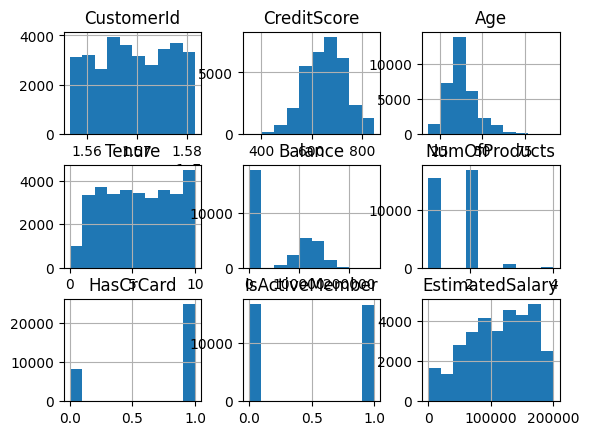

In [24]:
x_train.hist()

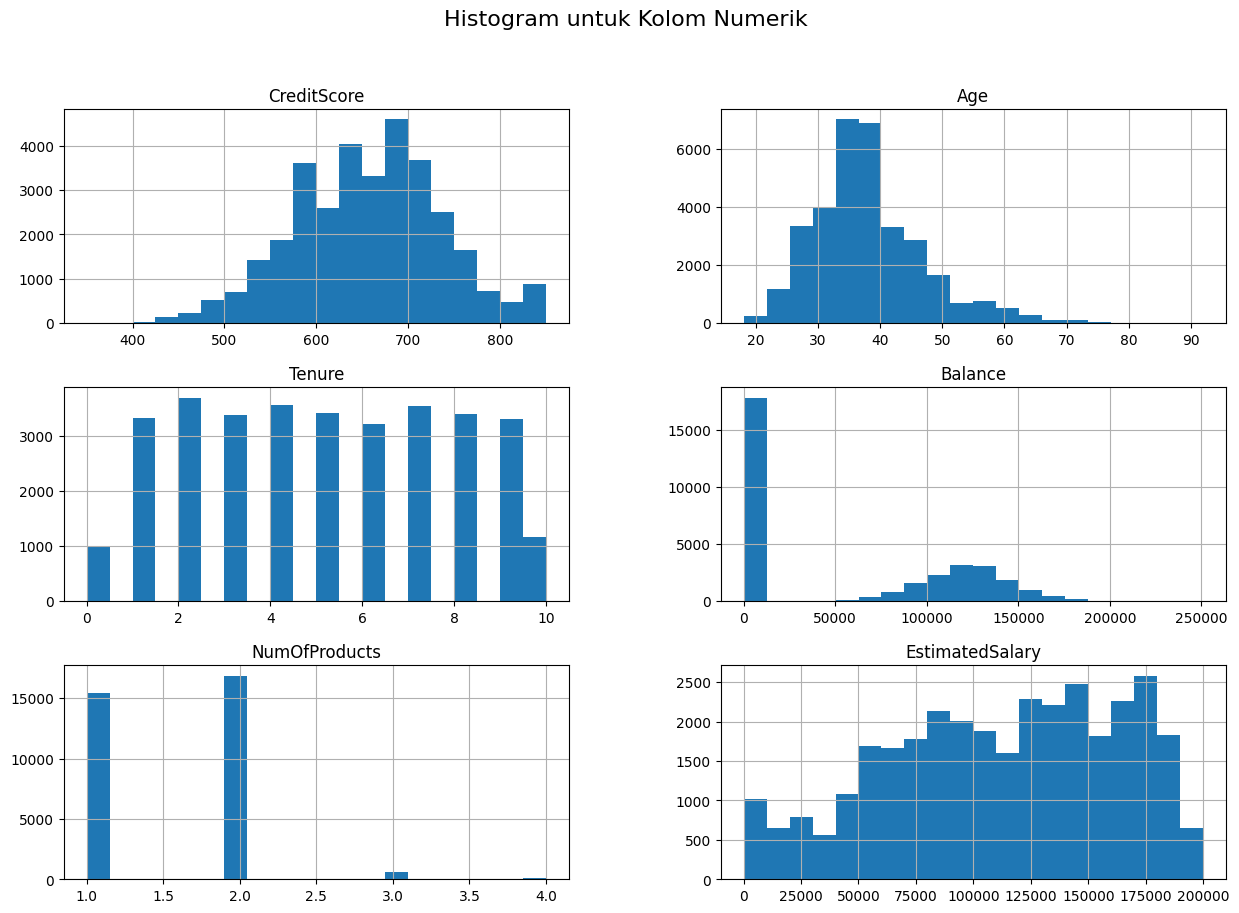

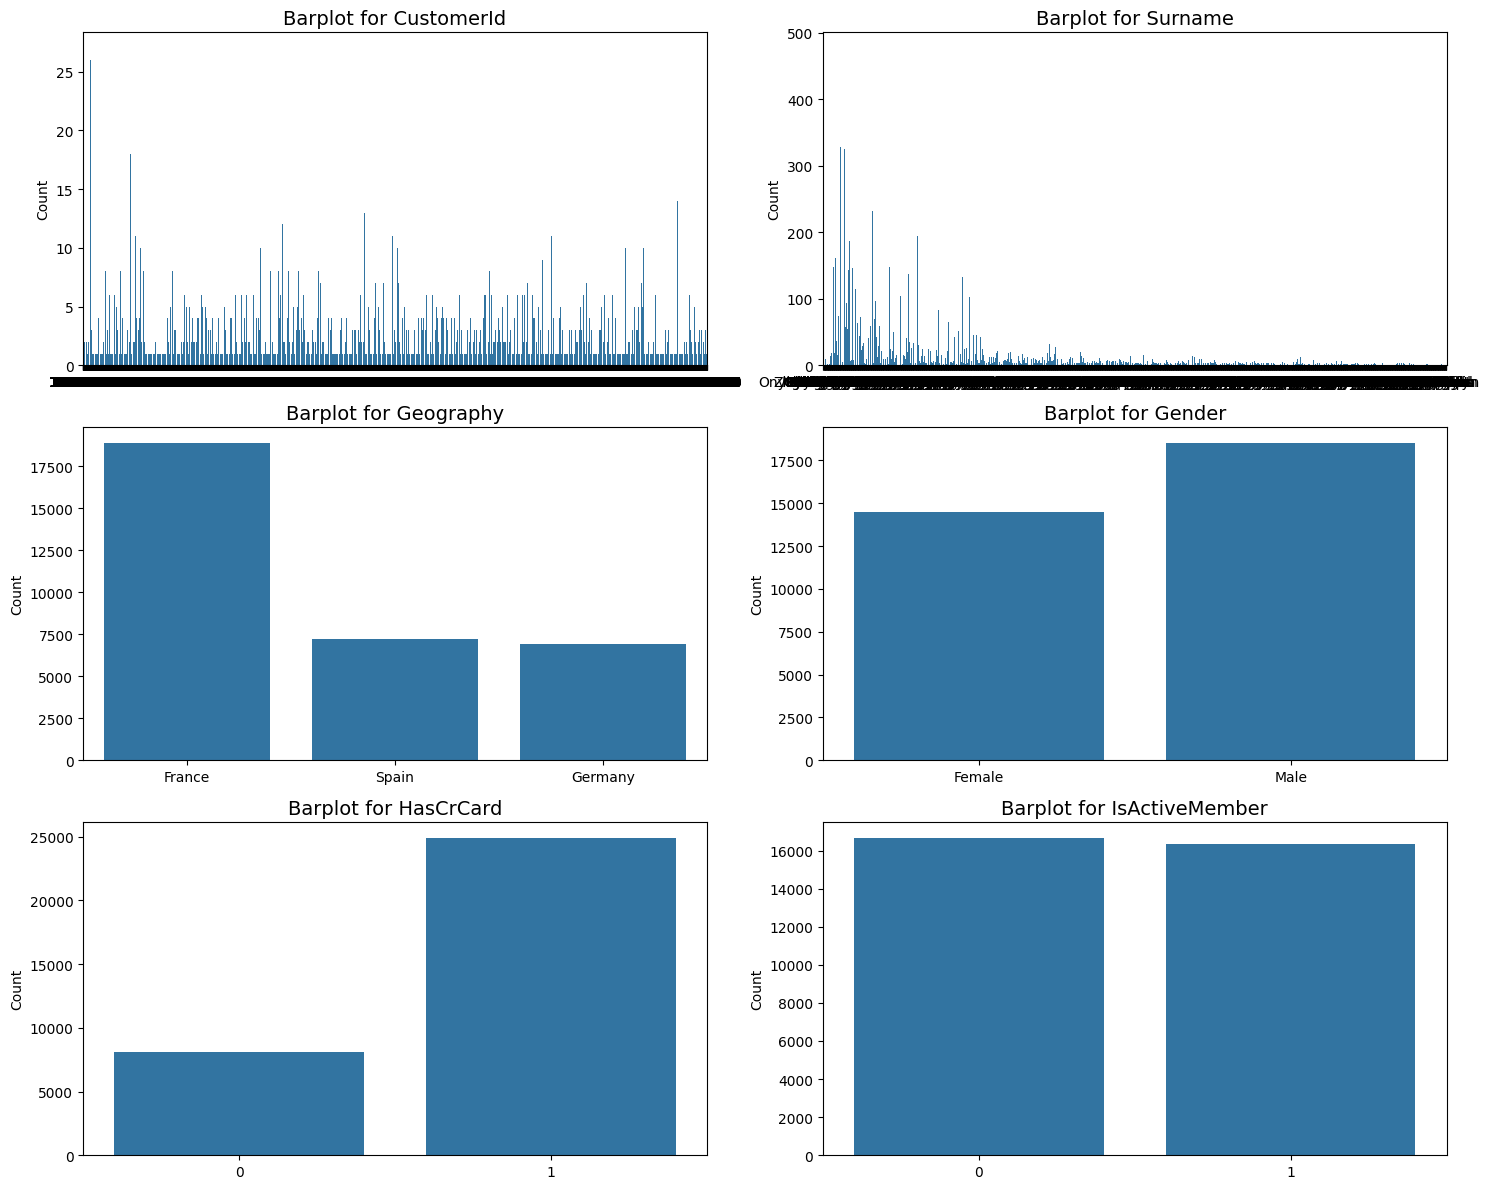

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram untuk kolom numerik
numeric_columns = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']
x_train[numeric_columns].hist(bins=20, figsize=(15, 10))
plt.suptitle('Histogram untuk Kolom Numerik', fontsize=16)
plt.show()

# Barplot untuk kolom kategorikal
categorical_columns = ['CustomerId','Surname','Geography', 'Gender', 'HasCrCard', 'IsActiveMember']

plt.figure(figsize=(15, 12))
for i, column in enumerate(categorical_columns, 1):
    plt.subplot(3, 2, i)
    sns.countplot(data=x_train, x=column)
    plt.title(f'Barplot for {column}', fontsize=14)
    plt.xlabel('')
    plt.ylabel('Count')

plt.tight_layout()
plt.show()


Dapat dilihat dari barplot sebenarnya 'Surname' dan kolom 'CustomerID' memiliki banyak sekali unique value. Dan perlu dianalisis lebih lanjut lagi apakah kedua kolom tersebut digunakan atau tidak dalam model

### Numerical Data

**Box Plot**

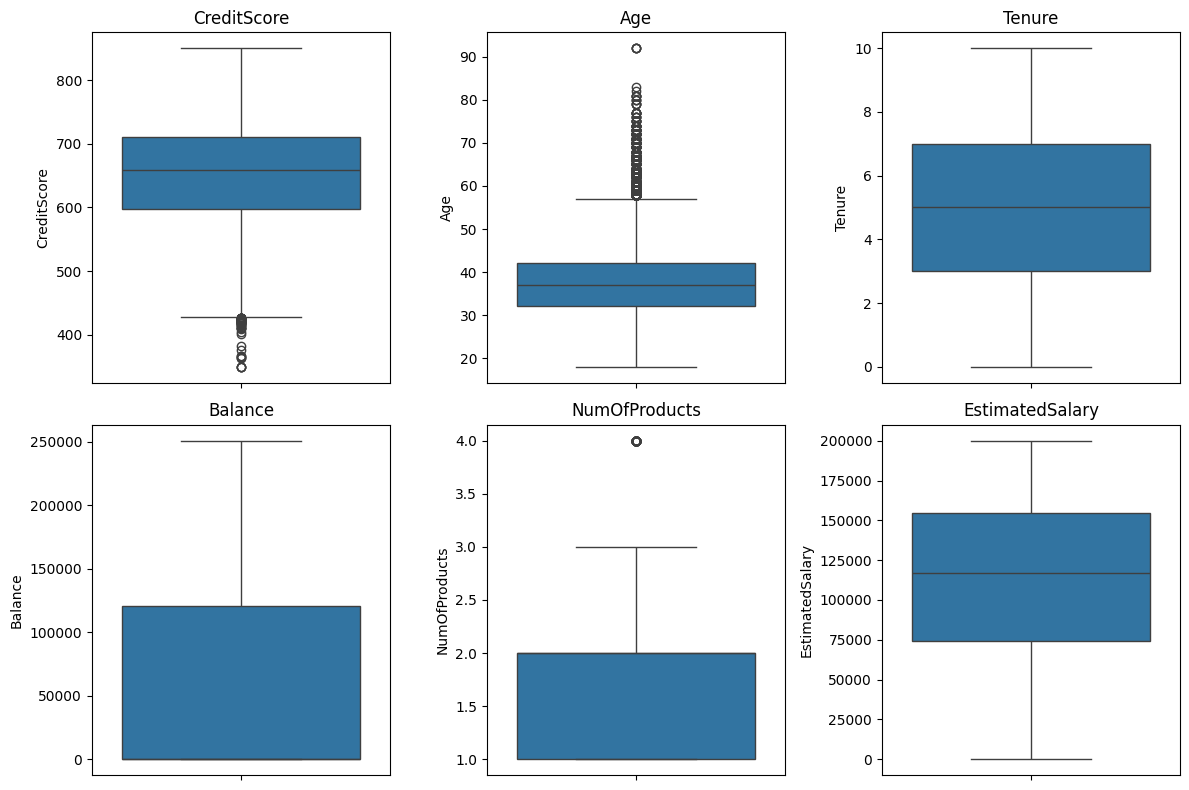

In [26]:
plt.figure(figsize=(12, 8))
for i, col in enumerate(numeric_columns, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x_train[col])
    plt.title(col)
plt.tight_layout()
plt.show()

**Outliers**

In [27]:
for col in numeric_columns:
    # Calculate IQR
    Q1 = x_train[col].quantile(0.25)
    Q3 = x_train[col].quantile(0.75)
    IQR = Q3 - Q1

    # Define the lower and upper bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    print(f"Column: {col}")
    print(f"Q1: {Q1}")
    print(f"Q3: {Q3}")

    # Identify outliers
    outliers = x_train[(x_train[col] < lower_bound) | (x_train[col] > upper_bound)]

    # Calculate the number of outliers
    num_outliers = len(outliers)

    # Calculate the percentage of outliers
    percentage_outliers = (num_outliers / len(x_train)) * 100

    # Print the results
    print(f"Number of outliers: {num_outliers}")
    print(f"Percentage of outliers: {percentage_outliers:.2f}%")
    print()

Column: CreditScore
Q1: 597.0
Q3: 710.0
Number of outliers: 54
Percentage of outliers: 0.16%

Column: Age
Q1: 32.0
Q3: 42.0
Number of outliers: 1232
Percentage of outliers: 3.73%

Column: Tenure
Q1: 3.0
Q3: 7.0
Number of outliers: 0
Percentage of outliers: 0.00%

Column: Balance
Q1: 0.0
Q3: 120467.045
Number of outliers: 0
Percentage of outliers: 0.00%

Column: NumOfProducts
Q1: 1.0
Q3: 2.0
Number of outliers: 92
Percentage of outliers: 0.28%

Column: EstimatedSalary
Q1: 74415.22
Q3: 154775.7
Number of outliers: 0
Percentage of outliers: 0.00%



Dapat dilihat bahwa terdapat outliers pada kolom Age sebanyak 3.73% dan sebanyak 0.16% pada kolom credit score.

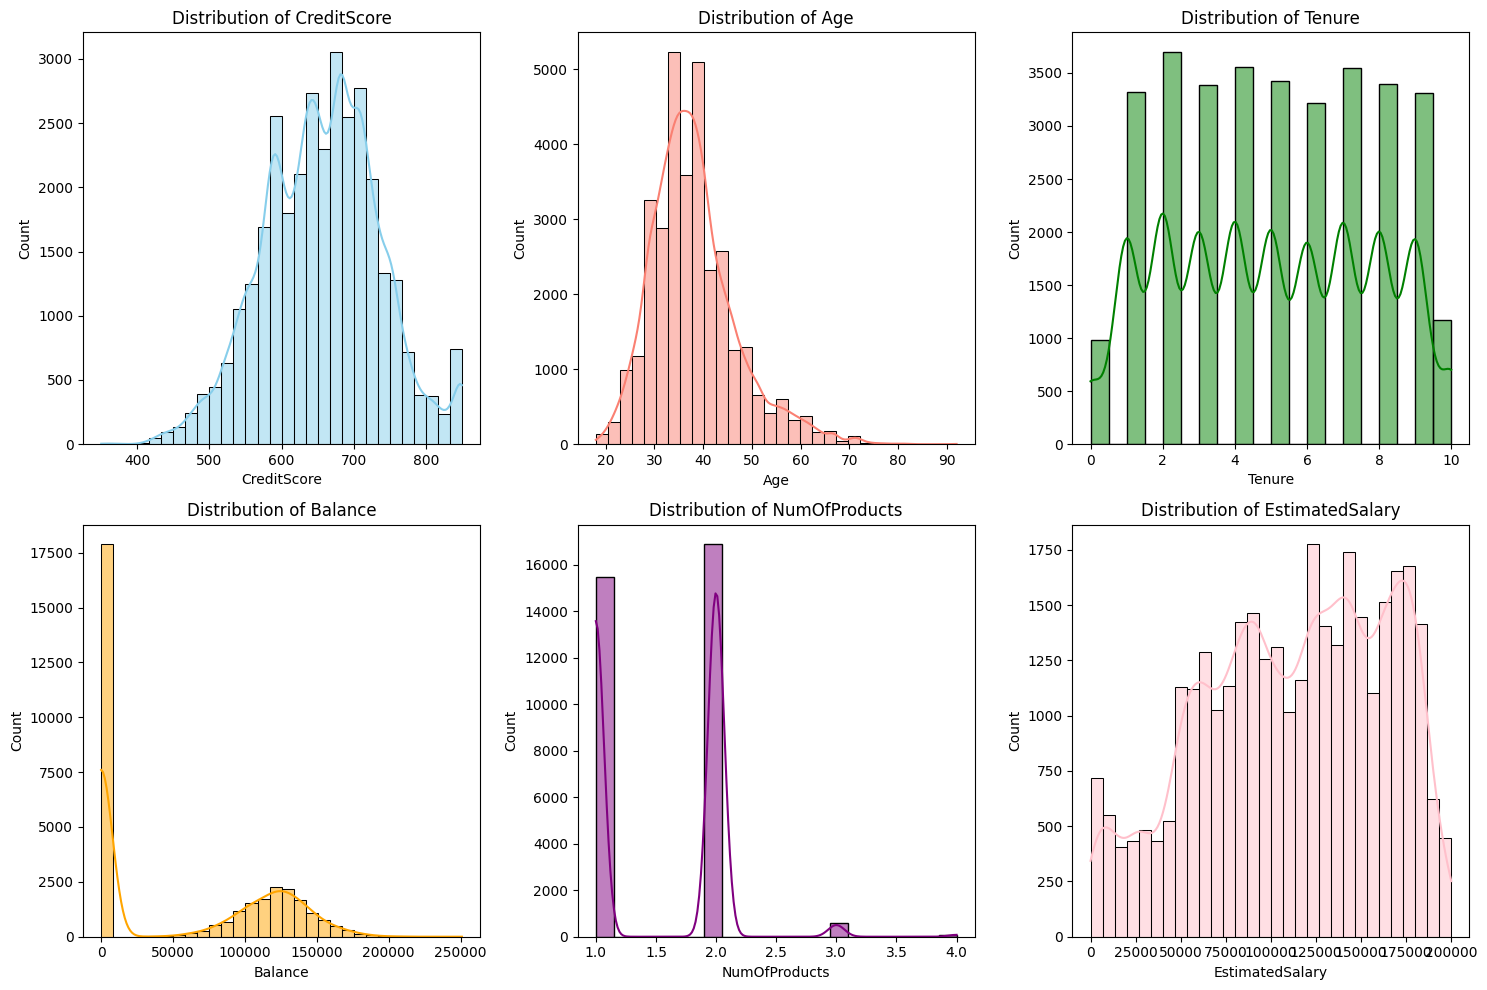

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

#x_train.hist()

# Set up a 2x3 grid for subplots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))

# Plot histograms for each numeric column
sns.histplot(x_train['CreditScore'], kde=True, ax=axes[0, 0], bins=30, color='skyblue')
axes[0, 0].set_title('Distribution of CreditScore')

sns.histplot(x_train['Age'], kde=True, ax=axes[0, 1], bins=30, color='salmon')
axes[0, 1].set_title('Distribution of Age')

sns.histplot(x_train['Tenure'], kde=True, ax=axes[0, 2], bins=20, color='green')
axes[0, 2].set_title('Distribution of Tenure')

sns.histplot(x_train['Balance'], kde=True, ax=axes[1, 0], bins=30, color='orange')
axes[1, 0].set_title('Distribution of Balance')

sns.histplot(x_train['NumOfProducts'], kde=True, ax=axes[1, 1], bins=20, color='purple')
axes[1, 1].set_title('Distribution of NumOfProducts')

sns.histplot(x_train['EstimatedSalary'], kde=True, ax=axes[1, 2], bins=30, color='pink')
axes[1, 2].set_title('Distribution of EstimatedSalary')

# Adjust layout
plt.tight_layout()
plt.show()

Dari histogram dapat dilihat bahwa persebaran data tidak normal

### Handling Numeric Data

**Impute Missing Value di kolom CreditScore**

Dikarenakan ada outliers, maka impute missing value menggunakan median train data.

In [29]:

x_train['CreditScore'].fillna(x_train['CreditScore'].median(), inplace=True)
x_test['CreditScore'].fillna(x_train['CreditScore'].median(), inplace=True)


C:\Users\asus\AppData\Local\Temp\ipykernel_34288\3424330079.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  x_train['CreditScore'].fillna(x_train['CreditScore'].median(), inplace=True)
C:\Users\asus\AppData\Local\Temp\ipykernel_34288\3424330079.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always b

In [30]:
x_train.isnull().sum()

CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
dtype: int64

In [31]:
x_test.isnull().sum()

CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
dtype: int64

Sudah tidak ada missing value baik dalam train data ataupun test data

### Standardize

Based on the conducted Exploratory Data Analysis (EDA), it is essential to normalize the numerical data in this dataset to make it suitable for inclusion in a model. We have chosen a feature-wise normalization approach, where the normalization is tailored to the characteristics of each column. Specifically, the 'Age' and 'CreditScore' columns have been standardize using  RobustScaler due to their outliers, aiming to mitigate the impact of outliers. On the other hand, we opted for MinMax Scaler to normalize their distribution

In [32]:
#ROBUST SCALER
from sklearn.preprocessing import RobustScaler
columns = ['CreditScore', 'Age']

scaler = RobustScaler()

x_train[columns] = scaler.fit_transform(x_train[columns])
x_test[columns] = scaler.transform(x_test[columns])

In [33]:
#MINMAX SCALER
from sklearn.preprocessing import MinMaxScaler
columns = ['Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']

scaler = MinMaxScaler()

x_train[columns] = scaler.fit_transform(x_train[columns])
x_test[columns] = scaler.transform(x_test[columns])

In [34]:
x_train.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
23629,15796722,Nwankwo,0.433628,France,Female,0.8,0.2,0.000000,0.000000,1,0,0.910414
6996,15591711,Udinesi,0.150442,Spain,Male,-0.2,0.7,0.000000,0.333333,1,0,0.830291
26510,15666047,Eluemuno,-0.123894,France,Female,-0.1,0.4,0.534005,0.000000,1,1,0.561664
40020,15716443,Chinwendu,1.168142,Spain,Male,0.0,0.1,0.000000,0.333333,1,0,0.664871
17668,15778955,Teng,-0.194690,France,Female,1.1,0.7,0.000000,0.333333,1,1,0.732880


Dapat dilihat bahwa kolom numerik telah distandarisasi dan normalisasi

### Categorical Data

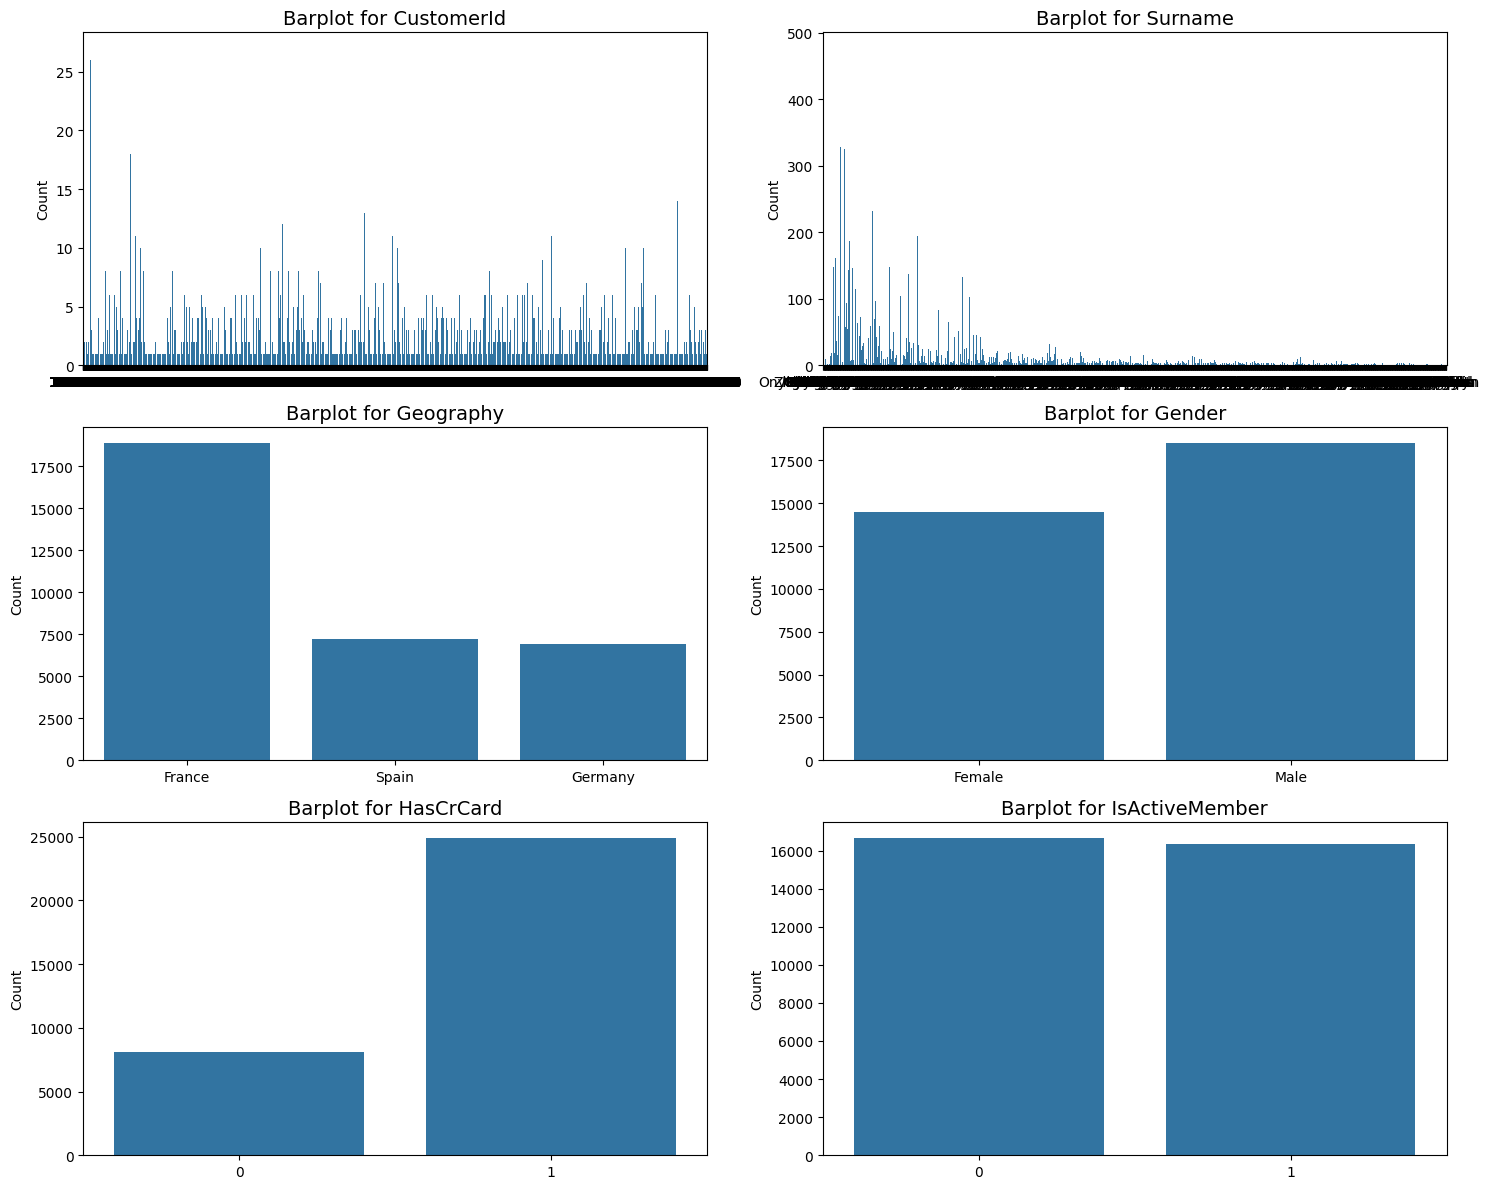

In [35]:
# Barplot untuk kolom kategorikal
categorical_columns = ['CustomerId','Surname','Geography', 'Gender', 'HasCrCard', 'IsActiveMember']

plt.figure(figsize=(15, 12))
for i, column in enumerate(categorical_columns, 1):
    plt.subplot(3, 2, i)
    sns.countplot(data=x_train, x=column)
    plt.title(f'Barplot for {column}', fontsize=14)
    plt.xlabel('')
    plt.ylabel('Count')

plt.tight_layout()
plt.show()

In [36]:
for column in categorical_columns:
    proportions = x_train[column].value_counts(normalize=True)
    print(f"Proportions for {column}:\n{proportions}\n")

Proportions for CustomerId:
CustomerId
15682533    0.000818
15570194    0.000788
15644796    0.000697
15682355    0.000697
15809837    0.000697
              ...   
15802593    0.000030
15652527    0.000030
15774731    0.000030
15682277    0.000030
15633067    0.000030
Name: proportion, Length: 11978, dtype: float64

Proportions for Surname:
Surname
Hsia           0.014451
T'ien          0.014058
Kao            0.009937
Hs?            0.009846
Ts'ui          0.009695
                 ...   
Wetherspoon    0.000030
Woolnough      0.000030
Louis          0.000030
Mueller        0.000030
Pye            0.000030
Name: proportion, Length: 2161, dtype: float64

Proportions for Geography:
Geography
France     0.571909
Spain      0.218741
Germany    0.209350
Name: proportion, dtype: float64

Proportions for Gender:
Gender
Male      0.56073
Female    0.43927
Name: proportion, dtype: float64

Proportions for HasCrCard:
HasCrCard
1    0.753658
0    0.246342
Name: proportion, dtype: float64

Propo

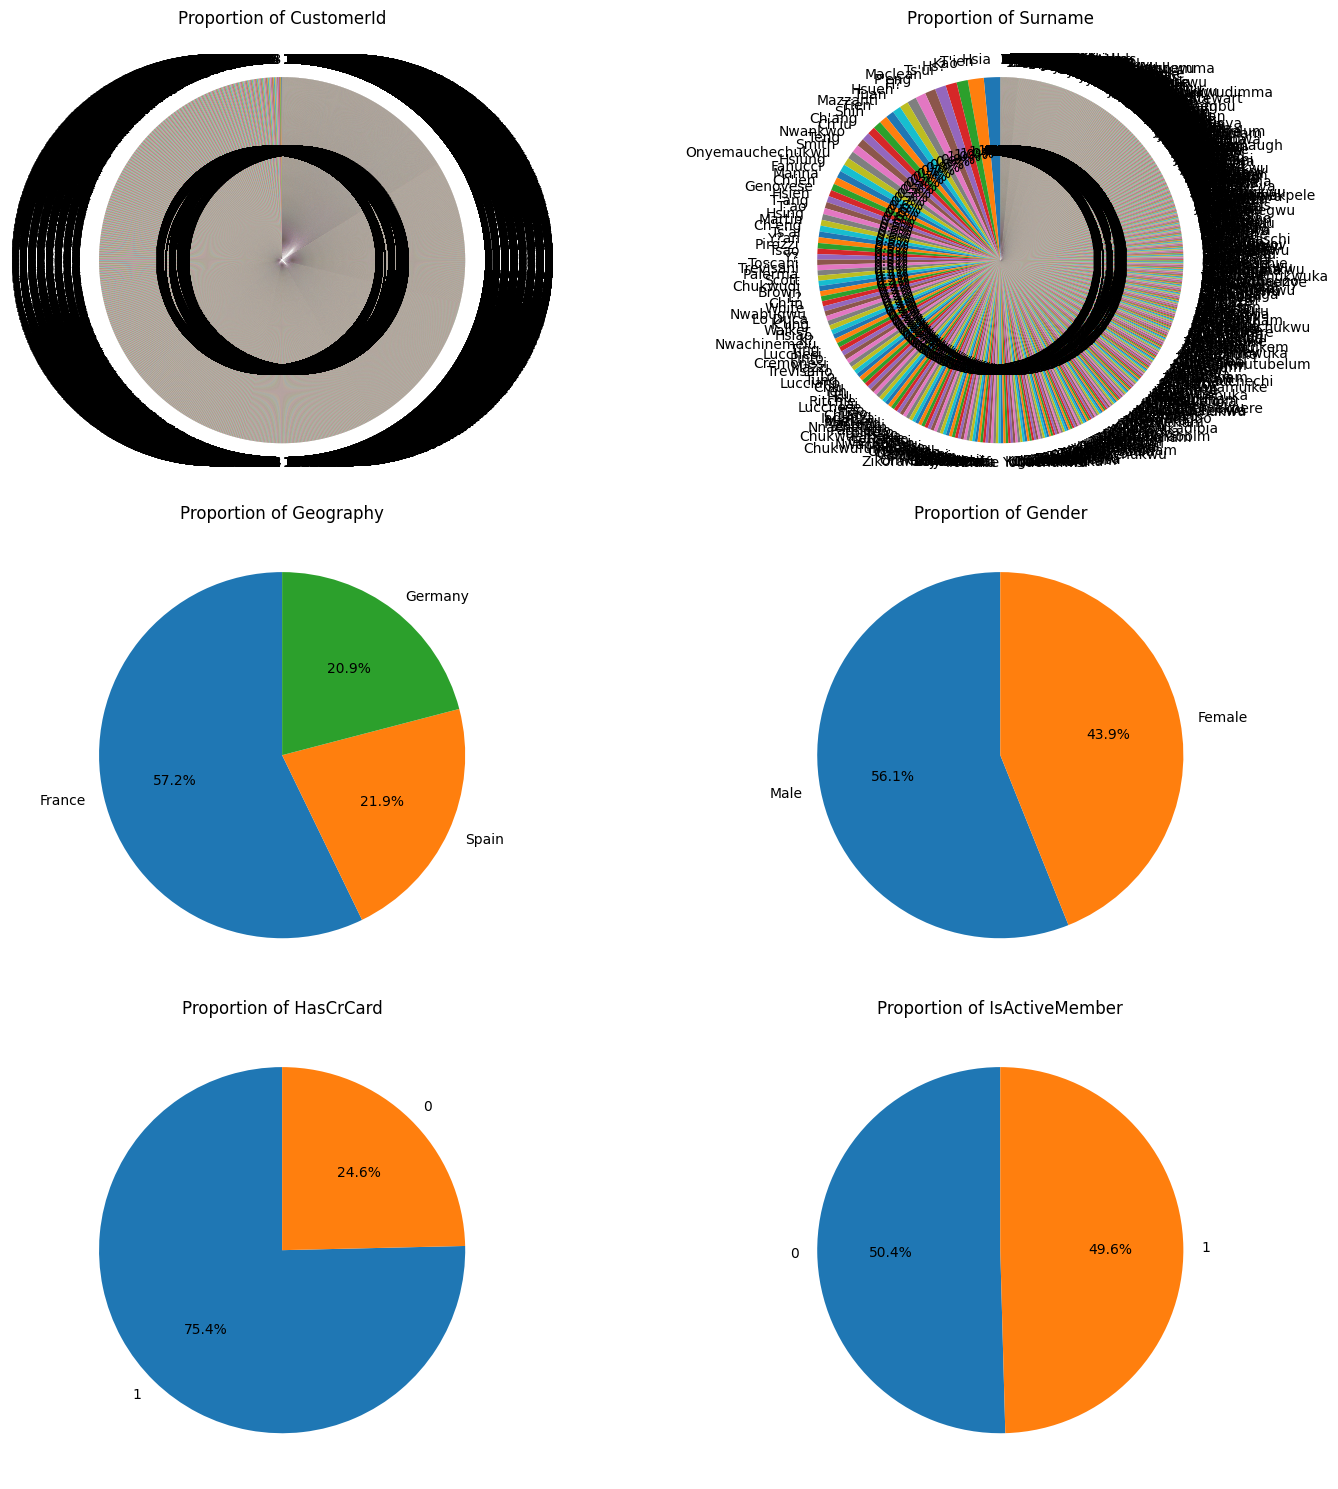

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 15))

for i, column in enumerate(categorical_columns):
    counts = x_train[column].value_counts()

    axes[i // 2, i % 2].pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=90)
    axes[i // 2, i % 2].set_title(f'Proportion of {column}')

plt.tight_layout()
plt.show()

Dapat ditunjukkan dari pie chart bahwa proporsi unique value pada kolom 'CustomerID' dan 'Surname' sangat kecil, maka kedua kolom ini akan di drop dan tidak digunakan dalam model.

In [38]:
x_train= x_train.drop(['CustomerId', 'Surname'], axis =1)
x_test= x_test.drop(['CustomerId', 'Surname'], axis =1)

In [40]:
x_train.shape

(33007, 10)

In [41]:
x_test.shape

(8252, 10)

Dapat dilihat bahwa setelah kolom 'CustomerId' dan 'Surname' di drop, hanya tersisa 10 kolom yang akan digunakan dalam training model

**Plot Hubungan antara Geography dengan Churn (target kolom)**

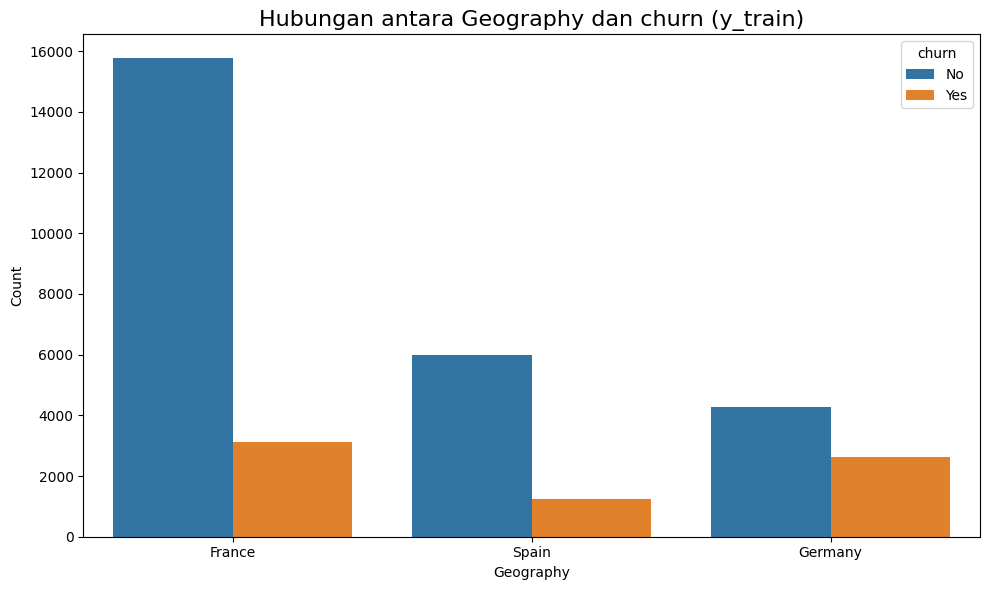

In [39]:
import pandas as pd

# Menggabungkan x_train dengan y_train untuk membuat DataFrame lengkap
train_df = pd.concat([x_train, y_train], axis=1)

plt.figure(figsize=(10, 6))
sns.countplot(data=train_df, x='Geography', hue='churn')
plt.title('Hubungan antara Geography dan churn (y_train)', fontsize=16)
plt.xlabel('Geography')
plt.ylabel('Count')
plt.legend(title='churn', labels=['No', 'Yes'])
plt.tight_layout()
plt.show()


Dari plot ini dapat dilihat bahwa meskipun Spain lebih sering muncul daripada Germany, namun pada data train ini dapat dilihat bahwa jumlah Churn=Yes pada data train ini lebih sedikit. Sehingga bisa jadi negara asal pelanggan juga berkorelasi dengan loan. Pengetahuan ini nantinya akan berguna dalam memutuskan feature encoding yang akan digunakan

### Features Engineering

In [165]:
x_train['Geography'].value_counts()

Geography
France     18877
Spain       7220
Germany     6910
Name: count, dtype: int64

In [166]:
x_train['Gender'].value_counts()

Gender
Male      18508
Female    14499
Name: count, dtype: int64

### One Hot Encoding Encoding
One-hot encoding digunakan untuk kolom 'Geography' karena negara asal pelanggan tidak memiliki hubungan ordinal (urutan). Setiap nilai dalam kolom 'Geography' adalah kategori yang berdiri sendiri tanpa ada urutan yang bermakna di antara mereka. Dengan menggunakan one-hot encoding, kita mengkodekan setiap negara sebagai variabel biner terpisah, yang memungkinkan model untuk memahami bahwa setiap negara adalah entitas yang berbeda secara independen tanpa membuat asumsi tentang hubungan ordinal di antara mereka.

Selain itu, penggunaan one-hot encoding memungkinkan model untuk menangkap pola atau korelasi yang mungkin ada antara negara asal pelanggan dan target yang ingin diprediksi, seperti churn (misalnya, apakah ada perbedaan perilaku antara pelanggan dari negara yang berbeda). Dengan demikian, informasi tentang negara asal pelanggan dapat memberikan wawasan tambahan yang berguna dalam membuat prediksi.

In [42]:
from sklearn.preprocessing import OneHotEncoder
#encoded geography for training data
x=x_train[['Geography']]
train_geo_encoded=OneHotEncoder()
train_data=pd.DataFrame(train_geo_encoded.fit_transform(x).toarray(),columns=train_geo_encoded.get_feature_names_out())
x_train=x_train.reset_index()
x_train=pd.concat([x_train,train_data], axis=1)

In [43]:
x_train.head(5)

,index,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain
0,23629,0.433628,France,Female,0.8,0.2,0.000000,0.000000,1,0,0.910414,1.0,0.0,0.0
1,6996,0.150442,Spain,Male,-0.2,0.7,0.000000,0.333333,1,0,0.830291,0.0,0.0,1.0
2,26510,-0.123894,France,Female,-0.1,0.4,0.534005,0.000000,1,1,0.561664,1.0,0.0,0.0
3,40020,1.168142,Spain,Male,0.0,0.1,0.000000,0.333333,1,0,0.664871,0.0,0.0,1.0
4,17668,-0.194690,France,Female,1.1,0.7,0.000000,0.333333,1,1,0.732880,1.0,0.0,0.0


In [44]:
#encoded geography for testing data
x=x_test[['Geography']]
test_data=pd.DataFrame(train_geo_encoded.transform(x).toarray(),columns=train_geo_encoded.get_feature_names_out())
x_test=x_test.reset_index()
x_test=pd.concat([x_test,test_data], axis=1)


In [45]:
x_test.head()

,index,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain
0,37555,0.185841,Spain,Female,-0.5,0.2,0.000000,0.333333,0,1,0.193034,0.0,0.0,1.0
1,4280,-0.477876,France,Male,-0.5,0.3,0.000000,0.333333,1,0,0.690264,1.0,0.0,0.0
2,36838,1.477876,Germany,Female,0.2,0.8,0.453991,0.333333,0,1,0.870242,0.0,1.0,0.0
3,39035,0.336283,Spain,Male,0.7,0.3,0.000000,0.000000,1,1,0.716796,0.0,0.0,1.0
4,22201,-0.964602,Germany,Female,1.9,0.2,0.412085,0.000000,1,0,0.454376,0.0,1.0,0.0


In [46]:
#menghapus kolom geography yang asli
x_train= x_train.drop(['Geography'], axis =1)
x_test= x_test.drop(['Geography'], axis =1)

In [47]:
x_train.head()

,index,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain
0,23629,0.433628,Female,0.8,0.2,0.000000,0.000000,1,0,0.910414,1.0,0.0,0.0
1,6996,0.150442,Male,-0.2,0.7,0.000000,0.333333,1,0,0.830291,0.0,0.0,1.0
2,26510,-0.123894,Female,-0.1,0.4,0.534005,0.000000,1,1,0.561664,1.0,0.0,0.0
3,40020,1.168142,Male,0.0,0.1,0.000000,0.333333,1,0,0.664871,0.0,0.0,1.0
4,17668,-0.194690,Female,1.1,0.7,0.000000,0.333333,1,1,0.732880,1.0,0.0,0.0


### Binary Encoding
Binary Encoding for 'Gender' 

Binary encoding is applied to the 'Gender' columns due to the binary nature of their values. 'Gender' has two possible values: 'Male' and 'Female'. Binary encoding converts these categorical values into binary representations (0 and 1), making them suitable for machine learning models that expect numerical input. This encoding simplifies the representation of binary categories, enhancing the efficiency of subsequent modeling tasks.

In [48]:
# Binary Encoding for X
train_gender_encode = {"Gender": {"Male": 1,"Female": 0}}
x_train = x_train.replace(train_gender_encode)
x_test = x_test.replace(train_gender_encode)

C:\Users\asus\AppData\Local\Temp\ipykernel_34288\2549952618.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  x_train = x_train.replace(train_gender_encode)
C:\Users\asus\AppData\Local\Temp\ipykernel_34288\2549952618.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  x_test = x_test.replace(train_gender_encode)


In [49]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33007 entries, 0 to 33006
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   index              33007 non-null  int64  
 1   CreditScore        33007 non-null  float64
 2   Gender             33007 non-null  int64  
 3   Age                33007 non-null  float64
 4   Tenure             33007 non-null  float64
 5   Balance            33007 non-null  float64
 6   NumOfProducts      33007 non-null  float64
 7   HasCrCard          33007 non-null  int64  
 8   IsActiveMember     33007 non-null  int64  
 9   EstimatedSalary    33007 non-null  float64
 10  Geography_France   33007 non-null  float64
 11  Geography_Germany  33007 non-null  float64
 12  Geography_Spain    33007 non-null  float64
dtypes: float64(9), int64(4)
memory usage: 3.3 MB


In [50]:
y_train.info()

<class 'pandas.core.series.Series'>
Index: 33007 entries, 23629 to 15795
Series name: churn
Non-Null Count  Dtype
--------------  -----
33007 non-null  int64
dtypes: int64(1)
memory usage: 515.7 KB


Dapat dilihat bahwa semua kolom sudah menjadi integer dan siap untuk dilanjutkan ke tahap berikutnya yaitu modelling

### Model

Random Forest

In [51]:
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings('ignore')

RF_class1 = RandomForestClassifier(criterion = 'gini', max_depth = 2)
RF_class1.fit(x_train, y_train)

RandomForestClassifier(max_depth=2)

In [52]:
y_predictRF1 = RF_class1.predict(x_test)

In [53]:
from sklearn.metrics import classification_report
print('\nClassification Report (Random Forest)\n')
print(classification_report(y_test, y_predictRF1, target_names = ['0', '1']))


Classification Report (Random Forest)

              precision    recall  f1-score   support

           0       0.79      1.00      0.88      6513
           1       0.00      0.00      0.00      1739

    accuracy                           0.79      8252
   macro avg       0.39      0.50      0.44      8252
weighted avg       0.62      0.79      0.70      8252



Tuning Hyperparameter using GridSearchCV

In [54]:
from sklearn.model_selection import GridSearchCV


parameters = {
    'criterion':['gini', 'entropy', 'log_loss'],
    'max_depth':[4,6,8,10,12],
}

In [55]:
RF_class2 = RandomForestClassifier()
RF_class2= GridSearchCV(RF_class2 ,
                            param_grid = parameters,   # hyperparameters
                            scoring='accuracy',        # metric for scoring
                            cv=5)

In [56]:
RF_class2.fit(x_train,y_train)
print("Tuned Hyperparameters :", RF_class2.best_params_)
print("Accuracy :",RF_class2.best_score_)

Tuned Hyperparameters : {'criterion': 'log_loss', 'max_depth': 12}
Accuracy : 0.8617564806742353


In [58]:
#Train the data using based parameter
RF_class_best = RandomForestClassifier(criterion= 'log_loss',max_depth=12)
RF_class_best.fit(x_train,y_train)
y_predict_best=RF_class_best.predict(x_test)
print('\nClassification Report\n')
print(classification_report(y_test, y_predict_best, target_names=['0','1']))


Classification Report

              precision    recall  f1-score   support

           0       0.88      0.96      0.92      6513
           1       0.76      0.49      0.60      1739

    accuracy                           0.86      8252
   macro avg       0.82      0.72      0.76      8252
weighted avg       0.85      0.86      0.85      8252



XG Boost Classifier

In [59]:
import xgboost as xgb

xgboost1= xgb.XGBClassifier()
xgboost1.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [60]:
y_predXG1= xgboost1.predict(x_test)
from sklearn.metrics import classification_report
print('\nClassification Report (XG Boost)\n')
print(classification_report(y_test, y_predXG1, target_names = ['0', '1']))


Classification Report (XG Boost)

              precision    recall  f1-score   support

           0       0.88      0.94      0.91      6513
           1       0.72      0.54      0.62      1739

    accuracy                           0.86      8252
   macro avg       0.80      0.74      0.76      8252
weighted avg       0.85      0.86      0.85      8252



Tuning Parameter

In [61]:
xgb_model = xgb.XGBClassifier()


param_grid = {
    'max_depth': [3, 4, 5],
    'learning_rate': [0.1, 0.01, 0.001],
    'n_estimators': [100, 200, 300],
    'gamma': [0, 0.1, 0.2],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

In [62]:
xgb_best = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=3, scoring='accuracy', n_jobs=-1)
xgb_best.fit(x_train, y_train)

# Melihat parameter terbaik dan skor terbaik
print("Best parameters found: ", xgb_best.best_params_)
print("Best accuracy found: ", xgb_best.best_score_)

Best parameters found:  {'colsample_bytree': 0.8, 'gamma': 0, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 300, 'subsample': 0.8}
Best accuracy found:  0.8640893820891086


In [63]:
best_xgb_model = xgb_best.best_estimator_

# Prediksi menggunakan model terbaik
y_pred_XGbest = best_xgb_model.predict(x_test)

# Print classification report
print('\nClassification Report (XG Boost - Tuned)\n')
print(classification_report(y_test, y_pred_XGbest, target_names=['0', '1']))


Classification Report (XG Boost - Tuned)

              precision    recall  f1-score   support

           0       0.88      0.95      0.92      6513
           1       0.75      0.52      0.62      1739

    accuracy                           0.86      8252
   macro avg       0.82      0.74      0.77      8252
weighted avg       0.85      0.86      0.85      8252



**Karena sebelumnya sudah dicheck bahwa class tidak seimbang, maka coba dilakukan oversampling**

Random Forest

In [64]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
x_train, y_train= smote.fit_resample(x_train, y_train)

In [73]:
x_train.shape

(52054, 13)

Sebelum oversampling, dalam data training asli terdapat :33007 baris

Setelah oversampling data training menjadi: 52054 baris

In [68]:
RF_oversampled = RandomForestClassifier(criterion = 'log_loss', max_depth = 12)
RF_oversampled.fit(x_train, y_train)

RandomForestClassifier(criterion='log_loss', max_depth=12)

In [69]:
y_predictRF_ov = RF_oversampled.predict(x_test)

In [70]:
from sklearn.metrics import classification_report
print('\nClassification Report (Random Forest)\n')
print(classification_report(y_test, y_predictRF_ov, target_names = ['0', '1']))


Classification Report (Random Forest)

              precision    recall  f1-score   support

           0       0.89      0.93      0.91      6513
           1       0.68      0.59      0.63      1739

    accuracy                           0.86      8252
   macro avg       0.79      0.76      0.77      8252
weighted avg       0.85      0.86      0.85      8252



XG Boost

In [71]:
import xgboost as xgb

xgboost_ov= xgb.XGBClassifier()
xgboost_ov.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [72]:
y_predXG_ov= xgboost_ov.predict(x_test)
from sklearn.metrics import classification_report
print('\nClassification Report (XG Boost)\n')
print(classification_report(y_test, y_predXG_ov, target_names = ['0', '1']))


Classification Report (XG Boost)

              precision    recall  f1-score   support

           0       0.89      0.94      0.91      6513
           1       0.70      0.55      0.62      1739

    accuracy                           0.86      8252
   macro avg       0.80      0.74      0.77      8252
weighted avg       0.85      0.86      0.85      8252



Karena Random Forest dan XGboost memiliki accuracy yang sama, maka saya akan memilih salah satu yaitu XGBoost default, dan menggunakan x_train dan y_train TANPA oversampling karena tidak ada perubahan yang signifikan dengan menggunakan oversampling maupun tidak. Hal ini berarti bahwa dengan data asli saja model sudah dapat memprediksi dengan cukup baik, oleh karena itu tidak diperlukan komputasi lebih apabila hasil yang didapatkan sama saja.